# Visualizing and Analysing Data

## Plotting

One of the best open-source visualization (plotting) packages is called MatPlotLib. It is capable of doing so much more than what I use it for - simple plotting, and it comes included in Anaconda, so hopefully you are able to simply pull up this notebook and be able to run the cells without having to worry about installing dependencies and such.

We can call this plotting library in Python (and Julia, but we won't look at that here) with the `import` command:

In [1]:
import matplotlib.pyplot as pt

It is useful to go to their website at this point if you are interested in seeing everything that `matplotlib` is capable of, as it is very robust. But I will focus on `pyplot`, a module for `matplotlib` that gives us all the plotting capabilites we're interested in. You may find other modules of `matplotlib` such as `plotly`, and those are very good for their uses and you should feel encouraged to explore what those other modules can accomplish. But `pyplot` is all we'll need here. It is also worth noting that `matplotlib` has their own tutorials, which will be a lot more thorough than what I'll provide here, so check those out! The goal of this notebook is simply to give you some experience with data examples that I may actually have in my research. But you could learn it all from tutorial pages elsewhere.

So now, suppose we have data to plot: `x` and `y`

In [2]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,4,9,16,25,36,49,64,81,100]

Now we call `matplotlib.pyplot` with the `pt` key

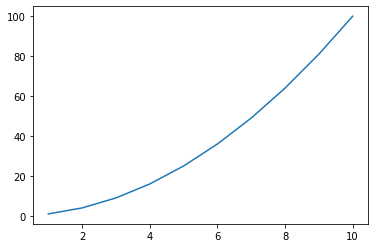

In [3]:
pt.plot(x,y)

Now this is a very pretty plot, but what information does it give us exactly? Well from looking at the data, you probably gathered that $y=x^2$. But that might not be necessarily obvious to anyone else, so lets put some labels on this plot.

Text(0.5, 1.0, 'y = x^2')

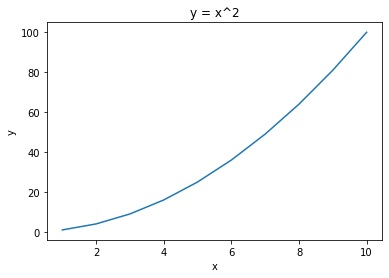

In [4]:
pt.plot(x,y)
pt.xlabel("x")
pt.ylabel("y")
pt.title("y = x^2")

Now this tells us something, but something that you should be learning in lab (the class), is that you always want units with your data. In this particular case, I gave you two vectors with numbers with no context as to what they are, so we can't really put units here. So let's suppose that the units of x are in meters (for no particular reason)

Text(0.5, 1.0, 'y = x^2')

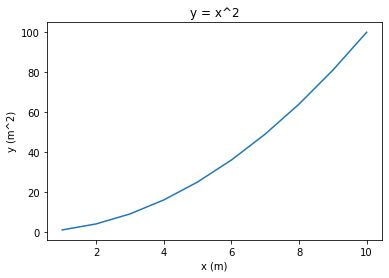

In [5]:
pt.plot(x,y)
pt.xlabel("x (m)")
pt.ylabel("y (m^2)")
pt.title("y = x^2")

Great, now we have a plot that has all the information we need from a plot. But lets try to make it prettier, more presentation quality. For this, we'll use $\LaTeX$ (LaTeX), which is a completely different monster to learn. For our purposes, we will only focus on equations via latex. To do this, you use the syntax `r"$equation content$"`. So the above plot should look like below

Text(0.5, 1.0, '$y = x^2$')

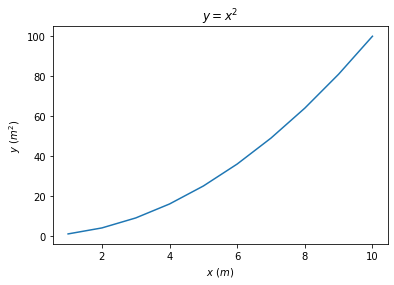

In [6]:
pt.plot(x,y)
pt.xlabel(r"$x\ (m)$")
pt.ylabel(r"$y\ (m^2)$")
pt.title(r"$y = x^2$")
# The "\" after "x" and "y" means space. The syntax $content$ will
# ingore all spaces, so you preceed them with "\" if you want them

Now this looks a lot more like publication quality. It's a very small detail, but good plots all are about details. I will even change the font to something that (in my opinion) looks better. This is now a personal preference, and you can forego this step. But for the publications we submit to, this makes the labels more consistent with the rest of the text.

In [7]:
pt.rc('text', usetex=True)

Now plot again, with customized fontsizes

Text(0.5, 1.0, '$y = x^2$')

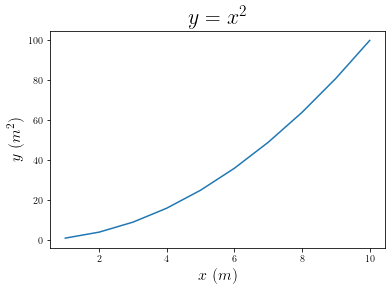

In [8]:
pt.plot(x,y)
pt.xlabel(r"$x\ (m)$", fontsize=16)
pt.ylabel(r"$y\ (m^2)$", fontsize=16)
pt.title(r"$y = x^2$", fontsize=22)
# The "\" after "x" and "y" means space. The syntax $content$ will
# ingore all spaces, so you preceed them with "\" if you want them

Now let's save this plot

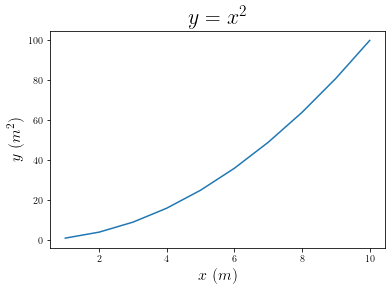

In [9]:
pt.plot(x,y)
pt.xlabel(r"$x\ (m)$", fontsize=16)
pt.ylabel(r"$y\ (m^2)$", fontsize=16)
pt.title(r"$y = x^2$", fontsize=22)
pt.savefig("samplePlot.png", dpi=300)

dpi specifies the pixel density of the image. 300 is much higher than you'd usually need, but it's not too heavy so I like playing it safe and not risking having low resolution images for presentations or papers. You might be thinking a nice alternative is to save the image as a .svg file, and indeed this is the best option for inserting images with most programs. However, it turns out that, for some reason, $\LaTeX$ does not support inserting .svg images, which is what most people in physics use for writing papers. And so we are stuck using .png or .jpg images ¯\\\_(ツ)\_/¯

#### IN ANY CASE

Let us now look at dealing with multiple data sets! For easier vector manipulation, I'll be suing `numpy`, the go-to numerical package in python.

In [2]:
import numpy as np

In [11]:
y1 = np.array(y)
y2 = 2*np.array(y)

`y1` and `y2` are now a numpy array data structure, which is very similar to the ones we had defined above, except now we can perform operations on them as mathematical vectors! For example the line `y2 = 2*np.array(y)` is scalar-vector multiplication, where as had I done `y2 = 2*y`, it would have returned two copies of the array `y` rolled into one.

Let us plot these onto the same plot!

Text(0.5, 1.0, '$y_1\\ \\textrm{and}\\ y_2\\ \\textrm{values}$')

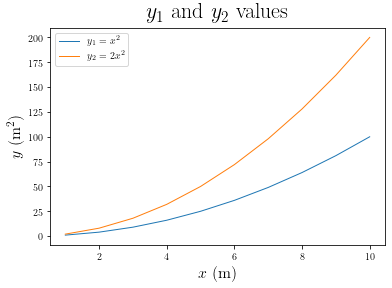

In [12]:
pt.plot(x, y1, label=r"$y_1 = x^2$", linewidth=1)
pt.plot(x, y2, label=r"$y_2 = 2x^2$", linewidth=1)
pt.legend()
pt.xlabel(r"$x\ (\textrm{m})$", fontsize=16)
pt.ylabel(r"$y\ (\textrm{m}^2)$", fontsize=16)
pt.title(r"$y_1\ \textrm{and}\ y_2\ \textrm{values}$", fontsize=22)

Becuase now we had sets of data with different information, we had to include a legend with appropriate labels, and a more fitting title. However, oftentimes it is convenient to have multiple plots in one figure. This allows us to create figures that are much easier to configures for papers! But now, we'll use somethine a little different than `plot`

Text(0.5, 1.0, '$y_1\\ \\textrm{and}\\ y_2\\ \\textrm{values}$')

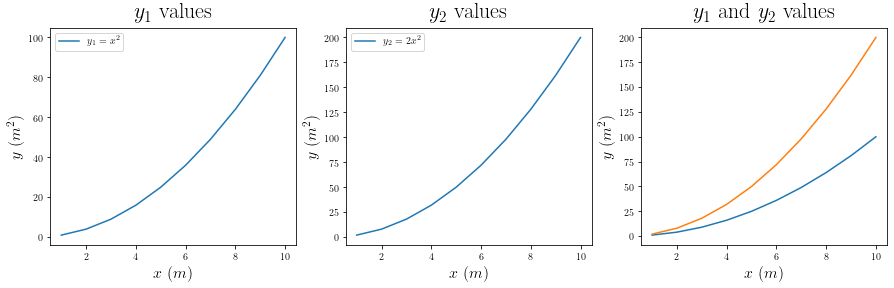

In [13]:
fig, ax = pt.subplots(1,3,sharex=True,sharey=False,figsize=(15,4))
ax[0].plot(x,y1,label=r"$y_1 = x^2$")
ax[0].set_xlabel(r"$x\ (m)$", fontsize=16)
ax[0].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[0].set_title(r"$y_1\ \textrm{values}$",fontsize=22)
ax[0].legend()
ax[1].plot(x,y2,label=r"$y_2 = 2x^2$")
ax[1].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[1].set_title(r"$y_2\ \textrm{values}$",fontsize=22)
ax[1].set_xlabel(r"$x\ (m)$", fontsize=16)
ax[1].legend()
ax[2].plot(x,y1, label=r"$y_1 = x^2$")
ax[2].plot(x,y2, label=r"$y_2 = 2x^2$")
ax[2].set_xlabel(r"$x\ (m)$",fontsize=16)
ax[2].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[2].set_title(r"$y_1\ \textrm{and}\ y_2\ \textrm{values}$", fontsize=22)

Using `subplots` vs `plot` has very similar syntax, but notice some slight differences with the way some labels are set. 

The line `fig, ax = pt.subplots(1,2,sharex=True,sharey=False,figsize=(10,4))` has a lot going on. The first 2 arguments specify the "rows, columns" of plots in the figure, in this case 1 by 2. But you can have a grid of as many subplots you want! The actual size being specified by `figsize=(10,4}`. The booleans `sharex, sharey` should be pretty ovious. Watch what happens when we run the same cell setting `sharey=True` 

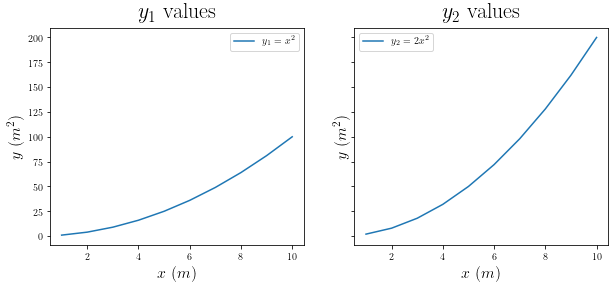

In [14]:
fig, ax = pt.subplots(1,2,sharex=True,sharey=True,figsize=(10,4))
ax[0].plot(x,y1,label=r"$y_1 = x^2$")
ax[0].set_xlabel(r"$x\ (m)$", fontsize=16)
ax[0].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[0].set_title(r"$y_1\ \textrm{values}$",fontsize=22)
ax[0].legend()
ax[1].plot(x,y2,label=r"$y_2 = 2x^2$")
ax[1].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[1].set_title(r"$y_2\ \textrm{values}$",fontsize=22)
ax[1].set_xlabel(r"$x\ (m)$", fontsize=16)
ax[1].legend()

One more important thing to note, the variable `ax` is used to address which subplot to manipulate, as you've probably figured out. Since we have a 1 dimensional grid of 2 subplots, these are simply addressed as `[0], [1]`. If however, you did a figure of 2 by 2 subplots, those would need to be addressed as 2 dimensional array as `[row][column]: [0][0], [0][1], [1][0], [1][1]`.

## Curve fitting

So hopefully you can run with `matplotlib` and start experimenting with it to customize your plots the way you like. We also used `numpy` for a little bit, though we didn't do much with it. So let's again call these two packages, and now a new one: `scipy`

We will use `scipy.optimize` for curve fitting

In [7]:
import matplotlib.pyplot as pt
import numpy as np
import scipy.optimize as sp
import time
pt.rc('text', usetex=True)

Now let's generate some data to fit, and emulate experimental data by adding some randomness.

In [3]:
def sampleFunction(x, A, B, C):
    return A*np.exp(-B*x) + C

In [10]:
xdata = np.linspace(0,5,1000) # creates array of 100 equally spaced values between -5 and 5
y = sampleFunction(xdata, 1.1, 0.5, 0.2)
np.random.seed(int(time.time()))
ynoise = 0.03*np.random.normal(size=xdata.size)
ydata = y + ynoise

Here, I created the noise by following the example in https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html, with a couple of tweaks. Don't worry so much about the random seed, I basically just like using the current time instead of a fixed number so that it's a little more random. Using a fixed seed will give you the same random distribution every time - but that's not really important here.

So suppose you have this data

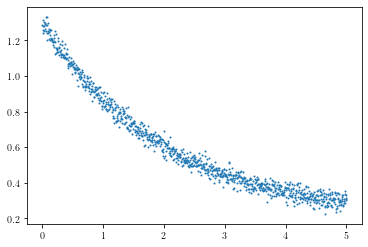

In [11]:
pt.scatter(xdata, ydata, s=1)

This form of exponential is very common in simulating damped or lossy systems, so it's very common in physics to see data of this form. Since a lot of the work I do is theoretical/computational, I don't usually see variance like this. But having the noise in this case is a good way to show case the `curve_fitting` function. It goes as follows

In [19]:
fit = sp.curve_fit(sampleFunction, xdata, ydata)
fit

(array([1.09563415, 0.50384772, 0.20572773]),
 array([[ 1.73983559e-05, -1.08439853e-05, -1.30565189e-05],
        [-1.08439853e-05,  3.74482755e-05,  2.71090451e-05],
        [-1.30565189e-05,  2.71090451e-05,  2.24402850e-05]]))

The first 3 parameters are the 3 parameters we were looking for, and they should be very close to the ones we used to generate the data: `[1.1, 0.5, 0.2]`. You can see that the fitted parameters are very close to that, which considering we put error in there is a great thing. The rest of the numbers returned by `curve_fit` are information about the error, which you should definitely read about in the link above.

Let us now plot our fit with our data.

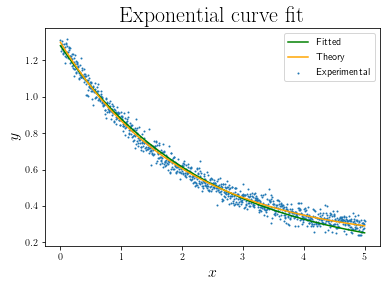

In [46]:
fitFunction = sampleFunction(xdata, fit[0][0], fit[0][1], fit[0][2])
pt.scatter(xdata, ydata, s=1, label=r"Experimental")
pt.plot(xdata, fitFunction, label=r"Fitted", color="g")
pt.plot(xdata, y, label=r"Theory", color="orange")
pt.xlabel(r"$x$", fontsize=16)
pt.ylabel(r"$y$", fontsize=16)
pt.title(r"$\textrm{Exponential curve fit}$", fontsize=22)
pt.legend()

Notice that we can't really see the difference between the fitted and the theory data. This is because there is relatively little error. We can see them better with a lot more error!

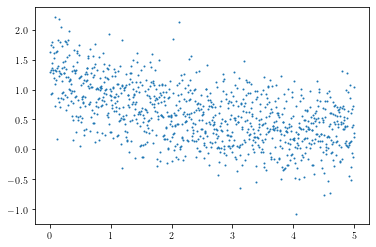

In [47]:
y = sampleFunction(xdata, 1.1, 0.5, 0.2)
np.random.seed(int(time.time()))
ynoise = 0.4*np.random.normal(size=xdata.size)
ydata = y + ynoise
pt.scatter(xdata, ydata, s=1)

In [22]:
fit = sp.curve_fit(sampleFunction, xdata, ydata)
fit

(array([1.17227353, 0.42029845, 0.10844779]),
 array([[ 0.00279453, -0.00202983, -0.00283907],
        [-0.00202983,  0.00318307,  0.0034692 ],
        [-0.00283907,  0.0034692 ,  0.00413304]]))

Even with all this noise, `curve_fit` does a pretty good job at getting us parameters to fit an exponential to this! Let's see what that looks like!

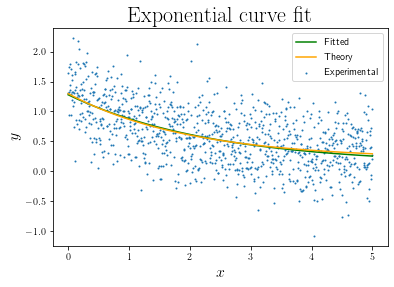

In [48]:
fitData = sampleFunction(xdata, fit[0][0], fit[0][1], fit[0][2])
pt.scatter(xdata, ydata, s=1, label=r"Experimental")
pt.plot(xdata, fitData, label=r"Fitted", color="g")
pt.plot(xdata, y, label=r"Theory", color="orange")
pt.xlabel(r"$x$", fontsize=16)
pt.ylabel(r"$y$", fontsize=16)
pt.title(r"$\textrm{Exponential curve fit}$", fontsize=22)
pt.legend()

So even though the parameters are not the exact ones, this looks very close to the expected result! Of course, we cheated a lot because the "experimental" data came straight from our model function, so of course the model function will give us something that's very close to what we want.

# Now its your turn

Read up on `numpy.savetxt` and `numpy.loadtxt` and extract the data from the `.dat` files in the repository. Feel free to open them in a text file if you want to look at the data to get a feel for what's what. But try to plot and fit them!

Also load the `.pls` files. The content in these files are parameters for the function

$$ f(t) = \sum_{n=1}^{20} c_n \sin \left( n\pi \frac{t}{t_p} \right), $$

in the format $[t_p,\ t_f,\ c_1,\ c_2,\ ...\ c_{20}]$.

So try to make a figure with two subplots, one with the contents of the `.dat` file fitted, and the other with the plots generated from the parameters in the `.pls` file. Assume the x axis is time in nanoseconds, the y axis for the `.dat` file is a unitless probability, and the `.pls` data is frequency in GHz.

Save the figure, you might need to use `pt.tight_layout()`.

In [20]:
sample = np.loadtxt("sample.pls")

In [18]:
def frequencyFunction(t, t_p, c):
    n=1
    Sum=0
    while n <= 20:
        m = c[n-1]*np.sin(n*np.pi*(t/t_p))
        Sum += m
        n += 1
    else:
        return(Sum)

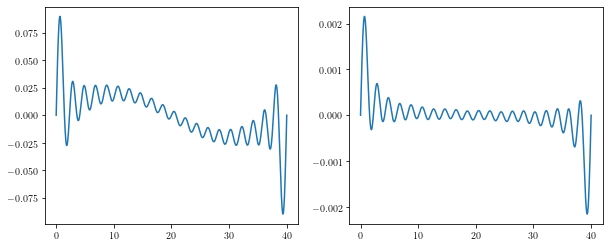

In [21]:
tData = np.linspace(0,40,1000)
fig, ax = pt.subplots(1,2,sharex=True,sharey=False,figsize=(10,4))
ax[0].plot(tData, frequencyFunction(tData, sample[0][0], sample[0][2:22]))
ax[1].plot(tData, frequencyFunction(tData, sample[1][0], sample[1][2:22]))

In [8]:
data0 = np.loadtxt("sample1.dat")
data1 = np.loadtxt("sample2.dat")
data2 = np.loadtxt("sample3.dat")
fit0 = sp.curve_fit(sampleFunction, data0[0], data0[1])
fit0

(array([7.49632675e-01, 1.85940647e-04, 2.18036992e-01]),
 array([[ 8.04583959e-10,  1.99416259e-13, -1.56336504e-13],
        [ 1.99416259e-13,  1.37511197e-16,  3.88949127e-14],
        [-1.56336504e-13,  3.88949127e-14,  3.92847686e-11]]))

C:\Users\Paul Varosy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app


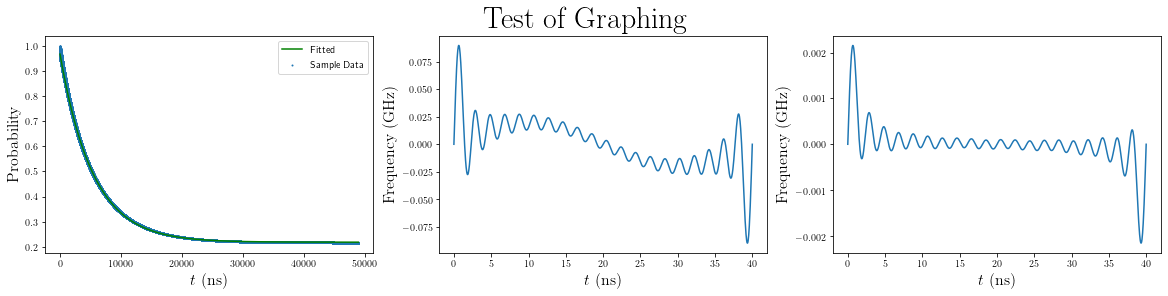

In [40]:
tData = np.linspace(0,40,1000)
fig, ax = pt.subplots(1,3,sharex=False,sharey=False,figsize=(20,4))
fig.suptitle(r"$\textrm{Test of Graphing}$", fontsize=30)
ax[0].scatter(data0[0], data0[1], s=1, label=r"Sample Data")
ax[0].plot(data0[0], sampleFunction(data0[0], fit0[0][0], fit0[0][1], fit0[0][2]), label=r"Fitted", color="g")
ax[0].set_xlabel(r"$t\ (\textrm{ns})$", fontsize=16)
ax[0].set_ylabel(r"$\textrm{Probability}$", fontsize=16)
ax[0].legend()
ax[1].plot(tData, frequencyFunction(tData, sample[0][0], sample[0][2:22]))
ax[1].set_xlabel(r"$t\ (\textrm{ns})$", fontsize=16)
ax[1].set_ylabel(r"$\textrm{Frequency}\ (\textrm{GHz})$", fontsize=16)
ax[2].plot(tData, frequencyFunction(tData, sample[1][0], sample[1][2:22]))
ax[2].set_xlabel(r"$t\ (\textrm{ns})$", fontsize=16)
ax[2].set_ylabel(r"$\textrm{Frequency}\ (\textrm{GHz})$", fontsize=16)
pt.savefig("Test_of_Graphing.png", dpi=300)